## PHYS 3363 - Computational Physics

# Utilizing Cellular Automata to Model Random Paths of Coastal Erosion

## Clarissa Skipworth, Dr. Richard Olenick, Ph.D.<sup>1

$^{1}$Department of Physics, University of  Dallas, Irving, TX USA

### 12/14/21

## Abstract

The randomized process of increased coastal erosion and its runoff caused by flooding due to increasing sea level can be modeled by a hybrid of cellular automata simulations. Such cellular automata simulations include the Kawasaki site exchange automaton, which is derived from the Ising Model as implemented through the Monte Carlo algorithm, and the Invasion Percolation model, which introduces randomness across a grid to simulate the spread of a pollutant. In this project report, we explore an elementary Pythonic implementation of 3D walks modified to approach this concept, and then discuss the more complex cellular automata models that simulate various frames depicting possible coastal erosion.

## Introduction

Accurate simulation of coastal erosion is especially useful to environmental scientists, whose research has been indicating for years that "there is a highly multiplicative association between long-term sandy beach erosion and sea level rise," and that "already-severe coastal erosion problems witnessed in the 20th century will be exacerbated in the 21st century under plausible global warming scenarios" (Zhang, 2004). Such coastal erosion can occur due to a variety of natural processes, where falling sand particles and sea level rise and subsequent flooding are especially relevant. Being able to predict and understand the process of erosion as simulated helps environmental and computer scientists in their further research. There have been complex hybrid attempts to model such randomized natural systems in a cost-effective way through Pythonic cellular automata simulations, one of which we draw upon in our research.

We begin this research procedure by first simulating a downward-falling 3D random walk, which models the random path any sand particle may take in its erosion down the hill of a coast. We extend this model to multiple downhill walkers that are directionally limited. This model gives us a preliminary understanding of the effects of erosion on a coastal shore, and in a scientific context, a simple introduction to the random walk algorithm that will form the basis of our cellular automata simulations.

We then continue to analyze applying randomized computation in cellular automata to model the complex systems composed of simple units, where a change operated upon a single or a few cells will generate ripples of change on a larger scale across a matrix. The two cellular automata relevant to this project are the Kawasaki site exchange automaton and the Invasion Percolation model. Since both models require an ambitious amount of code, we will focus on the Kawasaki automaton and briefly showcase an Invasion Percolation model. Combining these two models, as presented in the research done by Hawick et.al., results in a more accurate simulation that can hopefully give both environmental and computer scientists better insight into the natural randomness of coastal erosion.

## Procedures

#### Project Imports

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from scipy.ndimage import measurements

### Modeling a 3D Downhill Random Walk

We first simulate one path of a random walker down a "hillside," which in context of this project, represents coastal decline as the shore meets sea level.

#### Initialize Values

In [2]:
# Define number of steps
N = 2500

# Create storage of coordinates 
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
r2 = np.zeros(N) # radial distance
t = np.linspace(1,N,N)

direction = ['North', 'South', 'East', 'Down',]

By restricting the available directions to only 'North', 'South', 'East', and 'Down' (notably not including 'West' and 'Up'), we can simulate a more realistic path of an item going down a hill-like terrain.

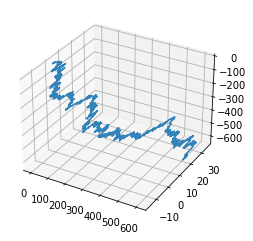

In [3]:
# Start random walking
for i in range(1,N):
    step = choice(direction) # randomly choose direction of motion
    
    # Adjust by step size of 1 in each direction
    if step == 'East':
        x[i] = x[i-1] + 1
        y[i] = y[i-1]
        z[i] = z[i-1]
    elif step == 'North':
        x[i] = x[i-1] 
        y[i] = y[i-1] + 1
        z[i] = z[i-1]
    elif step == 'South':
        x[i] = x[i-1] 
        y[i] = y[i-1] - 1
        z[i] = z[i-1]
    elif step == 'Down':
        x[i] = x[i-1]
        y[i] = y[i-1]
        z[i] = z[i-1] - 1
    
    
    r2[i] = x[i]**2 + y[i]**2 + z[i]**2
    
    
plt.figure()
plt.title("Random walk in 3D")
ax = plt.subplot(1,1,1, projection='3d')
ax.plot(x,y,z,alpha=0.9) # alpha is the darkness/shade of the path, 1.0 would be black
plt.show()

We now apply this same plotting technique across 30 seeds started at the same point source in the 3D graph to simulate a flow of multiple downhill random walkers.

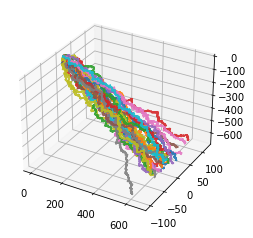

In [4]:
plt.figure()
plt.title("Random walk in 3D")

numwalkers = 30

for i in range(numwalkers):
    # Reset all the initial values
    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)
    r2 = np.zeros(N) # radial distance
    t = np.linspace(1,N,N)
    
    # Start random walking
    for i in range(1,N):
        step = choice(direction) # randomly choose direction of motion

        # Adjust by step size of 1 in each direction
        if step == 'East':
            x[i] = x[i-1] + 1
            y[i] = y[i-1]
            z[i] = z[i-1]
        elif step == 'North':
            x[i] = x[i-1] 
            y[i] = y[i-1] + 1
            z[i] = z[i-1]
        elif step == 'South':
            x[i] = x[i-1] 
            y[i] = y[i-1] - 1
            z[i] = z[i-1]
        elif step == 'Down':
            x[i] = x[i-1]
            y[i] = y[i-1]
            z[i] = z[i-1] - 1


        r2[i] = x[i]**2 + y[i]**2 + z[i]**2



    ax = plt.subplot(1,1,1, projection='3d')
    ax.plot(x,y,z,alpha=0.9) # alpha is the darkness/shade of the path, 1.0 would be black
plt.show()

Of course, although this simulation does present various random paths down a hillside-like decline, they do not rest upon a predetermined lattice or grid of the landscape, which means that each path's route runs independently from the others. A more realistic simulation will take convergence and diffusion of liquid paths across the same terrain into account, which is why we proceed to the Kawasaki Site Exchange Model.

### Kawasaki Site Exchange Model Simulation

#### Kawasaki's Basis: The Ising Model

The Kawasaki model is ideal to simulate this kind of system, since "if we restrict ourselves \[in using Kawasaki\] to the very slow processes which take place over very large spatial regions, the diffusion equation should normally give the good description of the process because in our model the only constant of motion is the total spin" (Kawasaki, 1966). Here we investiage a simulation of the Kawasaki Site Exchange Model, by first simulating its foundation, the Ising model, through the Monte Carlo method and Metropolis algorithm (Singh, 2020), and then reviewing its application in site exchange (Kawasaki, 1966). The Ising model is key to the theory of phase transitions, and mathematically models ferromagnetism (Singh, 2020).

We employ the Metropolis algorithm to implement the Ising model, as presented by Singh. Its main steps are:

1. Prepare an initial configuration of N spins
2. Flip the spin of a randomly chosen lattice site.
3. Calculate the change in energy dE.
4. If dE < 0, accept the move. Otherwise accept the move with probability $exp^{-dE/T}$. This satisfies the detailed balance condition, ensuring a final equilibrium state.
5. Repeat 2-4.

The code below estimates and plots energy, magnetization, specific heat and susceptibility of the system. These values are later used to simulate our diffusion; as Kawasaki himself described, "the problem of spin diffusion
in ferromagnets near the Curie point has received more theoretical treatment than others because of the apparent simplicity of the problem. This problem can be translated into the problem of
moleulcar diffusion in binary mixtures... The spin density and the external magnetic field correspond to the concentration and the chemical potential" (Kawasaki,1966).

#### Setup of functions used in configuration

In [5]:
# Generate a random spin config for the init condition
def initialstate(N):   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state


# Monte Carlo, using the Metropolis algorithm
def mcmove(config, beta):
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config



# Energy of a given configuration
def calcEnergy(config):
    energy = 0 
    
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/2.  # To compensate for over-counting


# Magnetization of a given configuration
def calcMag(config):
    mag = np.sum(config)
    return mag

#### Initial simulation values

In [6]:
nt = 32              #  Number of temperature points
N = 10               #  Size of the lattice, N x N
eqSteps = 2**8       #  Number of MC sweeps for equilibration
mcSteps = 2**9       #  Number of MC sweeps for calculation


T = np.linspace(1.53, 3.28, nt)
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2 = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# Divide by number of samples and by system size to get intensive values

#### Main program

In [7]:
for tt in range(nt):
    # Initialise
    config = initialstate(N)         

    E1 = M1 = E2 = M2 = 0
    iT=1.0/T[tt]
    iT2=iT*iT
    
    # Equilibrate
    for i in range(eqSteps):
        # Monte Carlo moves
        mcmove(config, iT)           

    for i in range(mcSteps):
        mcmove(config, iT)     
        # Calculate the energy
        Ene = calcEnergy(config)
        # Calculate the magnetisation
        Mag = calcMag(config)

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene


    # Divide by number of sites and iteractions to obtain intensive values    
    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT

#### Plotting

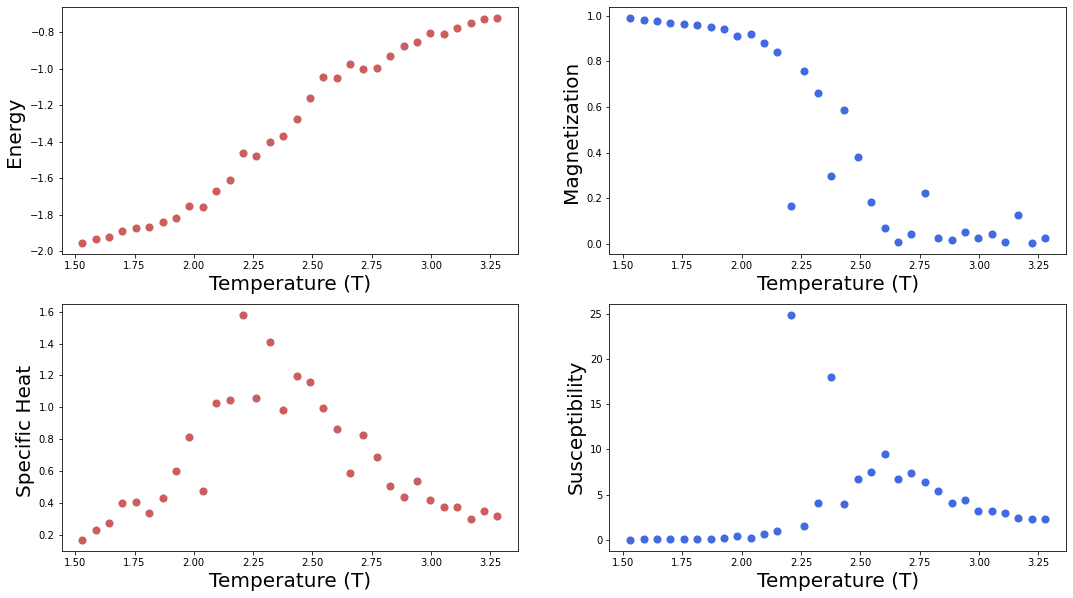

In [8]:
f = plt.figure(figsize=(18, 10))


sp =  f.add_subplot(2, 2, 1)
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20)
plt.ylabel("Energy ", fontsize=20)      
plt.axis('tight')


sp =  f.add_subplot(2, 2, 2)
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20)
plt.ylabel("Magnetization ", fontsize=20)
plt.axis('tight')


sp =  f.add_subplot(2, 2, 3)
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20)
plt.ylabel("Specific Heat ", fontsize=20)
plt.axis('tight')


sp =  f.add_subplot(2, 2, 4)
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20)
plt.ylabel("Susceptibility", fontsize=20)
plt.axis('tight')

plt.show()

Now we use this plotted data in the Monte Carlo method on the Ising model to produce snapshots of diffusion configurations over time.

In [9]:
%matplotlib inline

class Ising():
    ''' Simulating the Ising model '''    
    
    
    # Executes the Monte Carlo moves using Metropolis algorithm, 
    # such that detailed balance condition is satisified
    def mcmove(self, config, N, beta):
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    

    # Simulates the Ising model
    def simulate(self):   
        N, temp     = 64, .4        # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 1001
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            if i == 1:       self.configPlot(f, config, i, N, 2)
            if i == 4:       self.configPlot(f, config, i, N, 3)
            if i == 32:      self.configPlot(f, config, i, N, 4)
            if i == 100:     self.configPlot(f, config, i, N, 5)
            if i == 1000:    self.configPlot(f, config, i, N, 6)
                 
    # Plots the configuration once passed to it, along with time, etc.                
    def configPlot(self, f, config, i, N, n_):
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.Spectral)
        plt.title('Time=%d'%i)
        plt.axis('tight')    
    plt.show()

Please note that this next cell takes a few minutes to run and generate its simulation.

<ipython-input-9-df4e5d8955fb>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, config, cmap=plt.cm.Spectral)


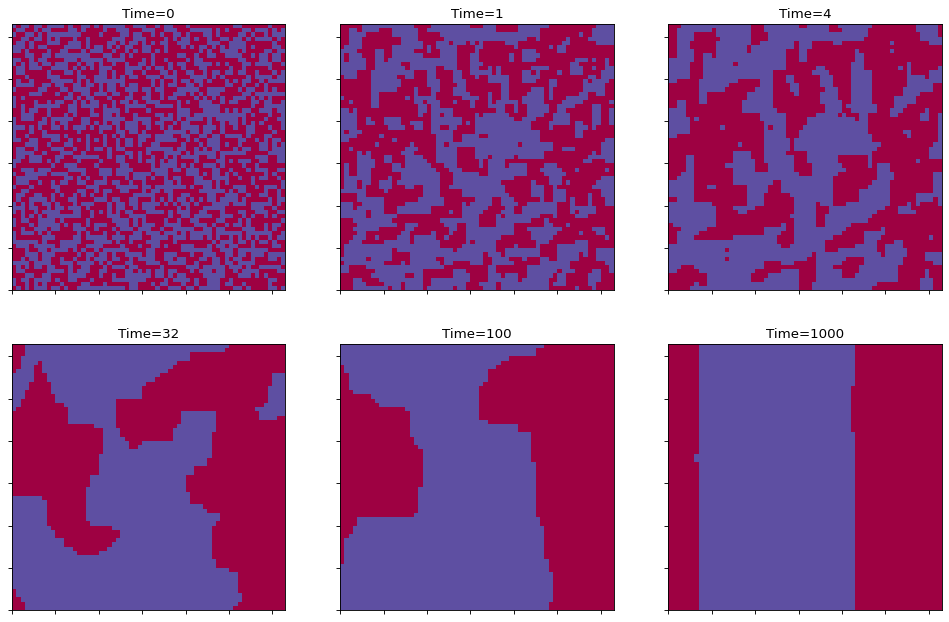

In [10]:
rm = Ising()
rm.simulate()

These results simulate a random initial state coarsening down to its equilibrium state. This same kind of computerized diffusion process can be applied to a 50/50 bar configuration, in which the following Invasion Percolation model dictates the movement of "an injected wetting fluid that invades the space occupied by a non-wetting defender fluid" (Hawick, 2014).

### Invasion Percolation Model Simulation

The Invasion Percolation simulation is typically used to model biphasic fluid migration in porous materials (Malthe-Sorenssen, 2020). We can apply it to coastal erosion by considering the coastline as the porous material being invaded and the ocean as the invading substance that percolates into and across the coast.

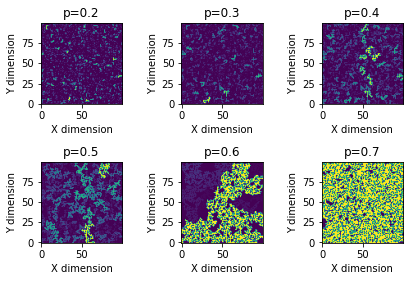

In [11]:
# Length of one side of the lattice
L = 100

# Probability for percolation values
percvals = [0.2,0.3,0.4,0.5,0.6,0.7] 
z = rand(L,L)

plt.title("Invasion Percolation at Varying Values")
for i in range(len(percvals)):
    p = percvals[i]
    m = z < p
    lw, num = measurements.label(m)
    area = measurements.sum(m, lw, index=arange(lw.max() + 1))
    areaImg = area[lw]
    plt.subplot(2,3,i+1)
    tit = 'p='+str(p)
    imshow(areaImg, origin='lower')
    plt.title(tit)
    plt.xlabel("X dimension")
    plt.ylabel("Y dimension")
    axis()
plt.tight_layout()
plt.show()

## Results

### Independent Analyses and Comparison of Models

The 3D Random walkers simulation gives us one approach to modelling coastal erosion, tracking the random path of particles as they fall down a hill. This current model is primitive in that it recreates the "terrain" of the hill for each walker, meaning the coastline is not accurately simulated for multiple particles in one flow. This model does, however, give us a good introduction to adjusting random paths to fit physical limitations. The simulation could be further modified with parameters by increasing the amount added to one of the steps, like a weighted 'Down', which would equally affect all walkers.

The Ising model requires a significant amount of code to establish and adjust configuration, but this is what makes the model powerful. Subsequently, the Kawasaki model builds on the data from this Ising configuration to produce the snapshots of 2D diffusion in action in a specific context.

The Invasion Percolation model, on the other hand, requires very minimal code yet produced just as visually rich of a simulation. This simplicity might be because it seems to be modeling more the behavior of an invading liquid rather than its direction and flow, which are computationally more involved.

### Analysis of the Hybrid Model

Ultimately, a combination of these two simulations under the 50/50 bar configuration of liquid diffusion from a non-wetting territory, representing the water, into the other side, representing the shoreline, will result in an approximate model of the coastal erosion simulation. While combining these two models is outside of the scope of this project, its result exemplifies diffusion as dictated by the Invasion Percolation simulation upon the Ising-based Kawasaki configuration. Here is a sample of the results from that hybrid model by Hawick et.al. in action.

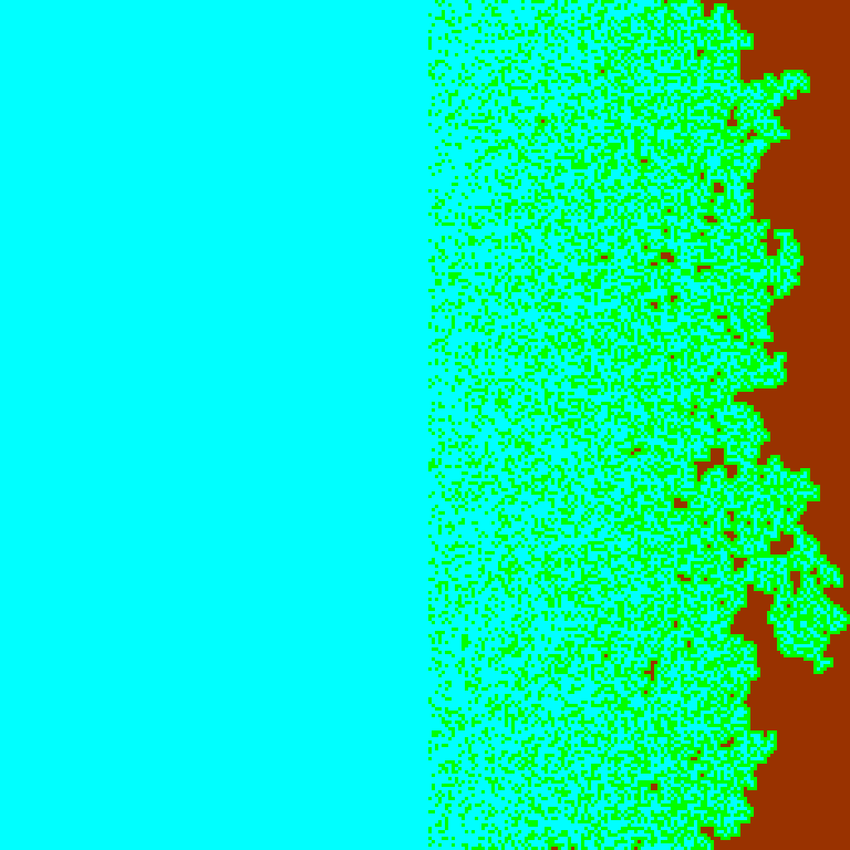
*Step 15,502 of an invasive model variant where cyan sea has penetrated and eroded brown land-mass.*
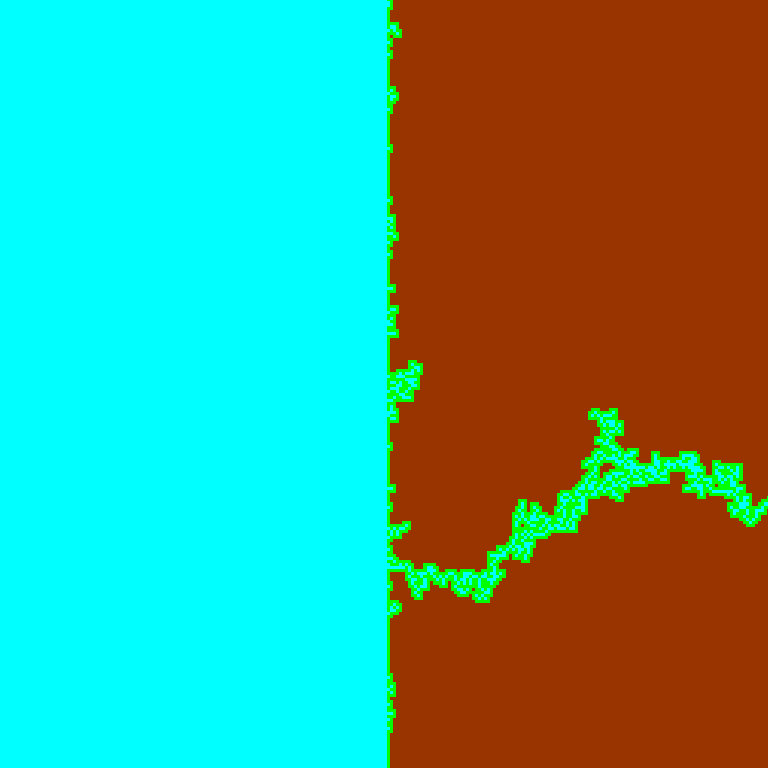
*Backward Model where negative percolation parameter gives rise to a single and rapid incursion at the expense of other fluctuations.*

### Discussion and Conclusion

The development of this hybrid program is cost-effective and its results are moderately accurate (as far as randomized data can be), although it takes surprisingly complex Python code to make the leap from randomized paths to randomized diffusion. I would like to see this hybrid model animated in 3D as it traverses across time steps. This kind of simulation would not only provide scientists with more insight into coastal erosion, but would quickly provide the average observer with a lasting impression of the longterm effects of erosion that are not typically noticed.

I would also like to note here that although much of the physics behind this I do not fully understand, learning about cellular automata in this context was valuable and seems simpler than it first appears. Although the recent Hawick paper includes pseudocode algorithms, I could not find open source code for Hawick's entire hybrid model; but as I pieced together its different parts, I began to see how its algorithm might be structured. It would be exciting to see the code itself in action in future research.

### References



Dearing, John, A. J. Plater, and N. C. Richmond. "Towards a high resolution cellular model for coastal simulation (CEMCOS)." AGU Fall Meeting Abstracts. Vol. 2004. 2004.

Hawick, K. A. *An agent model formulation of the ising model*. Tech. rep., Information and Mathematical Sciences, Massey University, Albany, North Shore 102-904, Auckland, New Zealand (November 2003), 2003.

Hawick, Ken A. "Modelling flood incursion and coastal erosion using cellular automata simulations." IASTED International Conference on Environmental Management and Engineeringl. 2014.

Ilievski, Vladimir. “Simple but Stunning: Animated Cellular Automata in Python.” Medium, Towards Data Science, 2 May 2021, https://towardsdatascience.com/simple-but-stunning-animated-cellular-automata-in-python-c912e0c156a9. 

Kawasaki, Kyozi. "Diffusion constants near the critical point for time-dependent Ising models. I." Physical Review 145.1 (1966): 224-230.

Malthe-Sorenssen, Anders. *Percolation Theory Using Python*. Department of Physics, University of Oslo, Apr 20, 2020. https://www.uio.no/studier/emner/matnat/fys/FYS4460/v20/notes/book.pdf.  5-11, 81-91, 161-169, 215-228.

Singh, Rajesh. “Ising Model: a Mathematical Model for Phase Transitions.” Blog, 22 Feb. 2020, https://rajeshrinet.github.io/blog/2014/ising-model/. 

Zhang, Keqi, Bruce C. Douglas, and Stephen P. Leatherman. "Global warming and coastal erosion." Climatic change 64.1 (2004): 41-58.